<a href="https://colab.research.google.com/github/shubhamkoul007/Acquire-Valued-Shopper-Challenge-Team1-TDL/blob/main/CLV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



In [2]:
"""
from google.colab import drive

drive.mount('/content/drive')

"""


"\nfrom google.colab import drive\n\ndrive.mount('/content/drive')\n\n"

In [3]:
# df=pd.read_excel('/content/drive/My Drive/Online Retail.xlsx')

In [5]:

df = pd.read_excel("Online Retail.xlsx" )

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df.shape

(541909, 8)

In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
import datetime as dt
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['day'] = df['InvoiceDate'].dt.day
df['month'] = df['InvoiceDate'].dt.month
df['hour']=df['InvoiceDate'].dt.hour
df['weekday'] = df['InvoiceDate'].dt.dayofweek

In [10]:
#Removing all customer id's with Null Value
df=df[pd.notnull(df['CustomerID'])]

#Removing all the returned items(Quantity less than equal to 0)
df=df[df['Quantity']>0]
df['Sales'] = df['Quantity'] * df['UnitPrice']
df[df['CustomerID']==12347]['Sales'].sum()#this monetary value does not match with the monetary value that we get after summary_from_transaction_data


4310.000000000001

In [11]:
print(df['CustomerID'].nunique())


4339


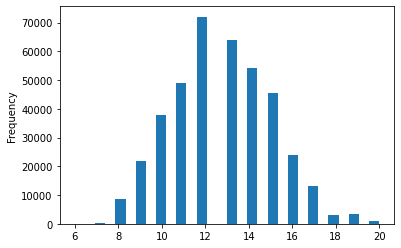

In [12]:
df['hour'].plot(kind='hist', bins=30)

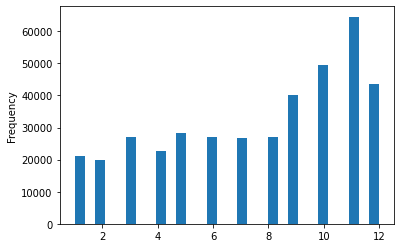

In [13]:
df['month'].plot(kind='hist', bins=30)

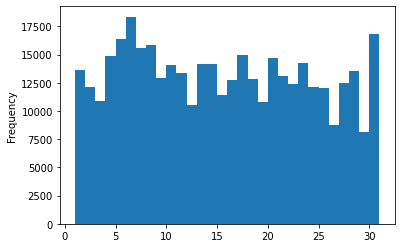

In [14]:
df['day'].plot(kind='hist', bins=30)

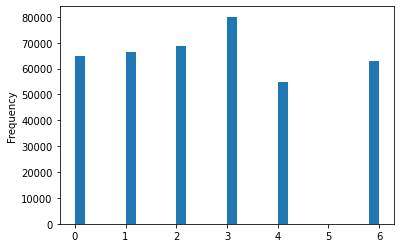

In [16]:
df['weekday'].plot(kind='hist', bins=30)

In [17]:
### number of gap days between purchases for all customers
df.head()
#cleaning the data
df1=df.loc[(df['CustomerID'].notnull()==True)]
df1=df1[df1['Quantity']>0]
df1['InvoiceDate']=pd.to_datetime(df1["InvoiceDate"]).dt.date
df1=df1[['CustomerID','InvoiceDate']]
uniqueids=sorted(df1['CustomerID'].unique())

#creating a list containing all transaction dates for the corresponding customer
date_list=[]

for id in uniqueids:

  date=df1[df1['CustomerID']==id]['InvoiceDate'].unique()
  date=sorted(date)
  date_list.append(date)
  
#creating a df with customer ids and the created col containing all purchase dates
date_df=pd.DataFrame(list(zip(uniqueids,date_list)),columns=['CustomerID','Purchase_dates'])
date_df.head()

,CustomerID,Purchase_dates
0,12346.0,[2011-01-18]
1,12347.0,"[2010-12-07, 2011-01-26, 2011-04-07, 2011-06-0..."
2,12348.0,"[2010-12-16, 2011-01-25, 2011-04-05, 2011-09-25]"
3,12349.0,[2011-11-21]
4,12350.0,[2011-02-02]


In [18]:
##creating a list containing number of gap days between purchases for each customer

gap_list=[]
n=len(date_df)
for i in range(n):
  purchase_dates=date_df['Purchase_dates'][i]
  m=len(date_df['Purchase_dates'][i])
  if m==1:
    gap_list.append(0)
  else:
    #gap=0
    for j in range(m-1):
      gap=gap_list.append(((purchase_dates[j+1]-purchase_dates[j]).days))

## creating a dataframe of all gap days
df_gap=pd.DataFrame(gap_list,columns=['gap_days'])
df_gap.head()



,gap_days
0,0
1,50
2,71
3,63
4,54


In [19]:
#viewing the frequency of each gap day
import numpy as np
lst=np.array(gap_list)
(unique, counts) = np.unique(lst, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies


array([[   0, 1549],
       [   1,  328],
       [   2,  296],
       [   3,  265],
       [   4,  265],
       [   5,  278],
       [   6,  306],
       [   7,  411],
       [   8,  287],
       [   9,  231],
       [  10,  209],
       [  11,  185],
       [  12,  227],
       [  13,  244],
       [  14,  358],
       [  15,  224],
       [  16,  183],
       [  17,  167],
       [  18,  148],
       [  19,  176],
       [  20,  201],
       [  21,  296],
       [  22,  179],
       [  23,  136],
       [  24,  125],
       [  25,  135],
       [  26,  127],
       [  27,  139],
       [  28,  223],
       [  29,  147],
       [  30,  132],
       [  31,  127],
       [  32,  107],
       [  33,  111],
       [  34,  131],
       [  35,  174],
       [  36,  128],
       [  37,  107],
       [  38,   97],
       [  39,  115],
       [  40,  103],
       [  41,  112],
       [  42,  160],
       [  43,  114],
       [  44,   87],
       [  45,   90],
       [  46,   84],
       [  47,

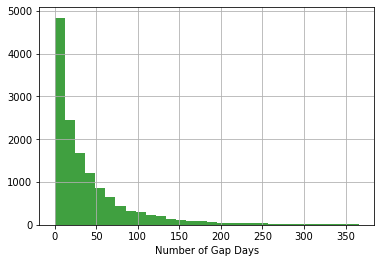

In [20]:
plt.hist(np.array(gap_list), 30, facecolor='g', alpha=0.75)
plt.grid()
plt.xlabel("Number of Gap Days")
plt.show()

In [21]:
!pip install lifetimes

     |████████████████████████████████| 593kB 2.3MB/s 


In [23]:

from lifetimes.plotting import *
from lifetimes.utils import *
data = summary_data_from_transaction_data(df, 'CustomerID', 'InvoiceDate', monetary_value_col='Sales', observation_period_end='2011-12-10')
data1 = data.copy()
data.head()

,frequency,recency,T,monetary_value
CustomerID,,,,
12346.0,0.0,0.0,326.0,0.000000
12347.0,6.0,365.0,368.0,599.701667
12348.0,3.0,283.0,359.0,301.480000
12349.0,0.0,0.0,19.0,0.000000
12350.0,0.0,0.0,311.0,0.000000


In [24]:
data.reset_index()
data=data.reindex(columns=['CustomerID','frequency','recency','T','monetary_value'])


In [25]:

data['CustomerID']=data.index
data.head()

,CustomerID,frequency,recency,T,monetary_value
CustomerID,,,,,
12346.0,12346.0,0.0,0.0,326.0,0.000000
12347.0,12347.0,6.0,365.0,368.0,599.701667
12348.0,12348.0,3.0,283.0,359.0,301.480000
12349.0,12349.0,0.0,0.0,19.0,0.000000
12350.0,12350.0,0.0,0.0,311.0,0.000000


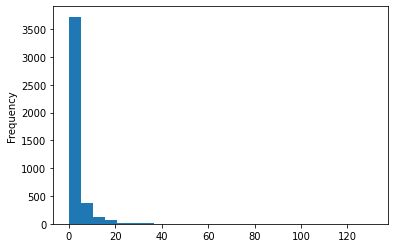

In [26]:
data['frequency'].plot(kind='hist', bins=25)

In [27]:
out=data[['CustomerID','frequency']]
(out.sort_values(by=['frequency'], ascending=False)).head(20)

,CustomerID,frequency
CustomerID,,
14911.0,14911.0,131.0
12748.0,12748.0,113.0
17841.0,17841.0,111.0
15311.0,15311.0,89.0
14606.0,14606.0,88.0
12971.0,12971.0,70.0
13089.0,13089.0,65.0
14527.0,14527.0,53.0
13798.0,13798.0,52.0


In [28]:
### percentage of customers with x repeat purchases
xd=pd.DataFrame(data['frequency'],columns=['frequency'])
xd=xd.groupby(['frequency']).size().reset_index(name='count%')
xd['count%']=(xd['count%']/(xd['count%'].sum())*100)
xd.head(10)

,frequency,count%
0,0.0,35.699470
1,1.0,20.142890
2,2.0,11.546439
3,3.0,8.942153
4,4.0,5.254667
5,5.0,4.240608
6,6.0,3.042176
7,7.0,1.982024
8,8.0,1.544135
9,9.0,1.106246


In [29]:

# average number of gap between purchases of  customers with repeat purchases
md=data[data['frequency']>0]
md=md[['frequency','recency']]
md['AvgPurDays']= (md['recency']/md['frequency']).round()
md.head(10)


,frequency,recency,AvgPurDays
CustomerID,,,
12347.0,6.0,365.0,61.0
12348.0,3.0,283.0,94.0
12352.0,6.0,260.0,43.0
12356.0,2.0,303.0,152.0
12358.0,1.0,149.0,149.0
12359.0,3.0,274.0,91.0
12360.0,2.0,148.0,74.0
12362.0,9.0,292.0,32.0
12363.0,1.0,133.0,133.0


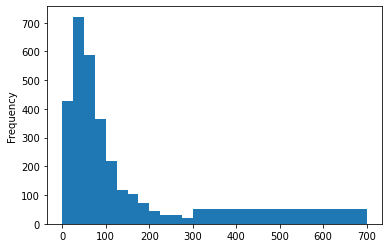

In [30]:
#histogram showing average purchase dates
bins=[0,25,50,75,100,125,150,175,200,225,250,275,300,700]
md['AvgPurDays'].plot(kind='hist', bins=bins)

In [31]:
md['AvgPurDays'].value_counts(bins=bins, sort=False).head(15)

(-0.001, 25.0]    454
(25.0, 50.0]      724
(50.0, 75.0]      575
(75.0, 100.0]     359
(100.0, 125.0]    209
(125.0, 150.0]    116
(150.0, 175.0]    107
(175.0, 200.0]     68
(200.0, 225.0]     46
(225.0, 250.0]     32
(250.0, 275.0]     27
(275.0, 300.0]     20
(300.0, 700.0]     53
Name: AvgPurDays, dtype: int64

In [32]:
data.describe()

,CustomerID,frequency,recency,T,monetary_value
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,2.864024,130.741415,223.782899,306.944168
std,1721.889758,5.952745,132.210176,117.883623,2612.453380
min,12346.000000,0.000000,0.000000,1.000000,0.000000
25%,13812.500000,0.000000,0.000000,113.000000,0.000000
50%,15299.000000,1.000000,93.000000,249.000000,176.940000
75%,16778.500000,3.000000,252.000000,327.000000,360.161667
max,18287.000000,131.000000,373.000000,374.000000,168469.600000


In [33]:
stdt=df['InvoiceDate'].min()
stdt

Timestamp('2010-12-01 08:26:00')

In [34]:
endt=df['InvoiceDate'].max()
endt

Timestamp('2011-12-09 12:50:00')

**BG/NBD implementation Time v/s Pareto/NBD implementation time**

**frequency-num of repeats=num of transactions-1**


**recency-age of customer from first transaction**


**T-age of customer till the observation period**

In [66]:
import time
start=time.time()
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(data['frequency'], data['recency'], data['T'])
#print(bgf)

end =time.time()
print("TIme elapsed :",end-start,"seconds")

TIme elapsed : 0.2891221046447754 seconds


In [37]:
import time
start=time.time()
from lifetimes import ParetoNBDFitter
pareto = ParetoNBDFitter(penalizer_coef=0.0)
pareto.fit(data['frequency'], data['recency'], data['T'])
#print(bgf)

end =time.time()
print("TIme elapsed :",end-start,"seconds")


TIme elapsed : 2.724942684173584 seconds


What are the expected number of transactions a customer is to make in the next time period, given his recency (age at last purchase) and frequency (the number of repeat transactions he has made)??

Frequency/Recency Matrix

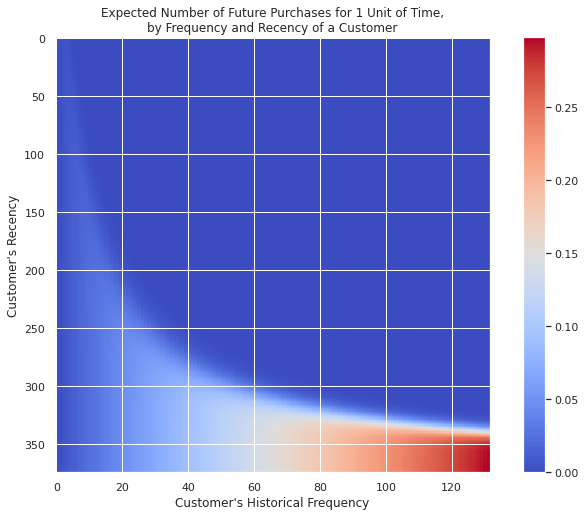

In [38]:
import seaborn as sns
sns.set_palette("husl")
sns.set(rc={'image.cmap':'coolwarm'})
%matplotlib inline
from lifetimes.plotting import plot_frequency_recency_matrix

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
plot_frequency_recency_matrix(bgf)

What is the probability of a customer being alive??


In [39]:
recency=(data['recency'].to_numpy())
freq=data['frequency'].to_numpy()


rf =zip(recency,freq)
lst=[]

for r,f in rf:
    lst.append(bgf.conditional_probability_alive_matrix(int(data['frequency'].max()),int(data['recency'].max()))[int(r),int(f)])
print(lst)

[1.0, 0.9996184957131284, 0.9989176866055391, 1.0, 1.0, 0.9974813461718293, 1.0, 1.0, 1.0, 0.9991659939906717, 1.0, 0.9978625368964519, 0.9988051618292724, 0.9961913014705267, 1.0, 0.9980475163918869, 0.9975445407385217, 0.9842430796867275, 1.0, 1.0, 0.9991755996522065, 0.9879659055367018, 0.9983804425697295, 1.0, 1.0, 0.9961178113790903, 0.9923520880414699, 1.0, 0.9961623166874648, 0.9947818577573596, 0.9729259437052997, 0.9918529955672845, 0.9963326818537234, 0.9908846807471492, 0.9991122480185559, 1.0, 1.0, 0.9985990895128638, 0.9979489547179586, 0.9995753962192349, 0.996603963433037, 1.0, 0.9923951418617528, 1.0, 1.0, 1.0, 1.0, 0.9980611542527947, 0.9965783458725528, 0.9979298278412548, 0.9928045448336064, 1.0, 0.9916434925963287, 0.9989250843870254, 0.9913516387912423, 0.9980927676625128, 0.9995764340116339, 1.0, 1.0, 0.9991325794473883, 0.998440979293137, 0.9995544435105924, 1.0, 1.0, 1.0, 0.9994038525172229, 0.9973746626221113, 0.9994731784609387, 1.0, 0.9993421932924693, 0.9951

In [40]:
data['CustomerID']=data.index
df_prob_alive = pd.DataFrame(list(zip(data['CustomerID'].to_numpy(), lst)),
               columns =['ID', 'alive_prob']) 
df_prob_alive.head(10)

,ID,alive_prob
0,12346.0,1.000000
1,12347.0,0.999618
2,12348.0,0.998918
3,12349.0,1.000000
4,12350.0,1.000000
5,12352.0,0.997481
6,12353.0,1.000000
7,12354.0,1.000000
8,12355.0,1.000000
9,12356.0,0.999166


What is the  probability a customer is alive based on their frequency and recency.??

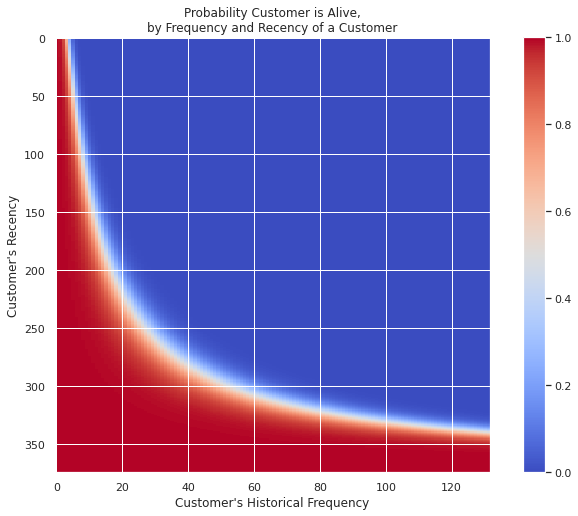

In [41]:
from lifetimes.plotting import plot_probability_alive_matrix
fig =plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf)

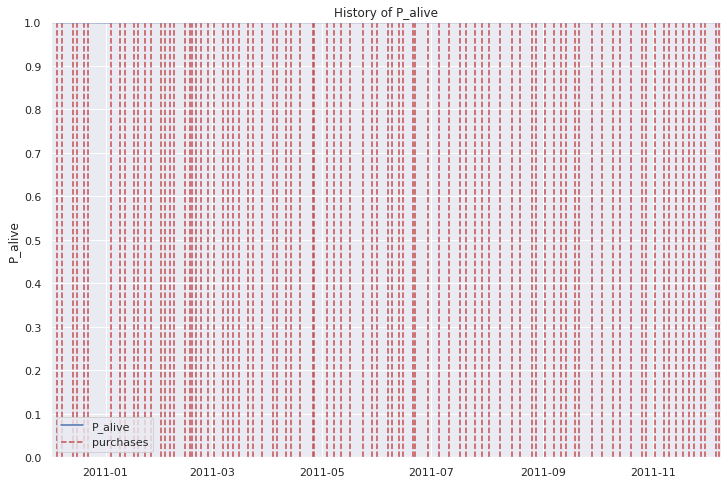

In [50]:

from lifetimes.plotting import plot_history_alive


fig = plt.figure(figsize=(12,8))

id = 14606
days_since_birth = 365
sp_trans = df.loc[df['CustomerID'] == id]
plot_history_alive(bgf, days_since_birth, sp_trans, 'InvoiceDate')


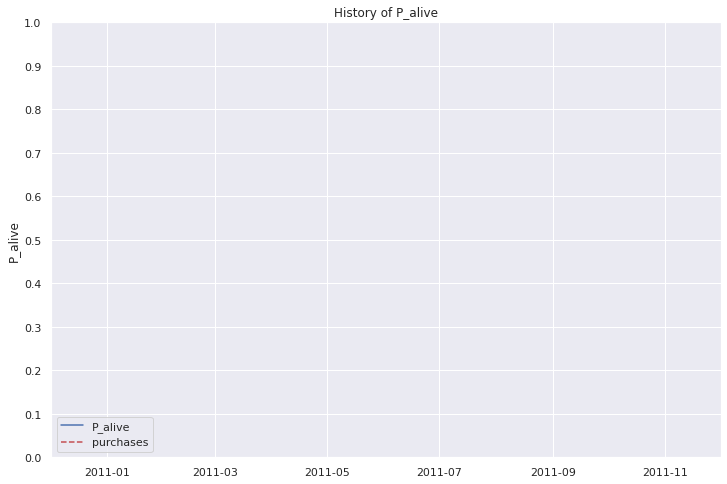

In [47]:
fig = plt.figure(figsize=(12,8))
id = 14729
days_since_birth = 365
sp_trans = df.loc[df['CustomerID'] == id]
plot_history_alive(bgf, days_since_birth, sp_trans, 'InvoiceDate')

What is the expected number of purchases of a customer in the next t days???


In [51]:
t=10
data['predicted_purchases']=bgf.conditional_expected_number_of_purchases_up_to_time(t,
                                                       data['frequency'],
                                                       data['recency'],
                                                       data['T'])
data.head()
data.sort_values(by='predicted_purchases').tail(5)
#Listed below are our top 5 customers that the model expects them to make purchases in the next day.

,CustomerID,frequency,recency,T,monetary_value,predicted_purchases
CustomerID,,,,,,
14606.0,14606.0,88.0,372.0,374.0,135.890114,2.003901
15311.0,15311.0,89.0,373.0,374.0,677.729438,2.026485
17841.0,17841.0,111.0,372.0,374.0,364.452162,2.522796
12748.0,12748.0,113.0,373.0,374.0,298.360885,2.567949
14911.0,14911.0,131.0,372.0,374.0,1093.661679,2.974008


In [ ]:
#(thought)from here also we can get our most valuabe customers-the customers that the model predicts 
#will be making more purchases in the near future.

How good is our model??

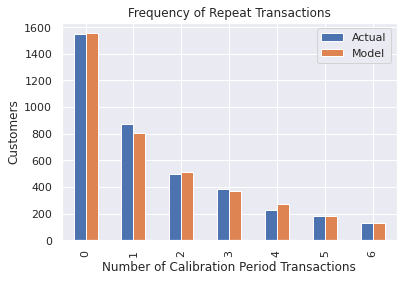

In [ ]:
#Calibration Period = Training Set 
#Holdout Period = Testing Set

from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

#Here Calibration Period and Holdout Period
#are both whole observation period
#So model has overfitting

**TRAIN TEST SPLIT**

In [35]:
data2 = calibration_and_holdout_data(df, 'CustomerID', 'InvoiceDate', calibration_period_end='2011-06-10',monetary_value_col='Sales')
data2.head(20)

,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout
CustomerID,,,,,,,
12346.0,0.0,0.0,143.0,0.000000,0.0,0.000000,182.0
12347.0,3.0,184.0,185.0,498.053333,3.0,26.300625,182.0
12348.0,2.0,110.0,176.0,297.220000,1.0,103.333333,182.0
12350.0,0.0,0.0,128.0,0.000000,0.0,0.000000,182.0
12352.0,3.0,34.0,114.0,421.770000,3.0,20.090000,182.0
12353.0,0.0,0.0,22.0,0.000000,0.0,0.000000,182.0
12354.0,0.0,0.0,50.0,0.000000,0.0,0.000000,182.0
12355.0,0.0,0.0,32.0,0.000000,0.0,0.000000,182.0
12356.0,1.0,80.0,143.0,481.460000,1.0,29.175000,182.0


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


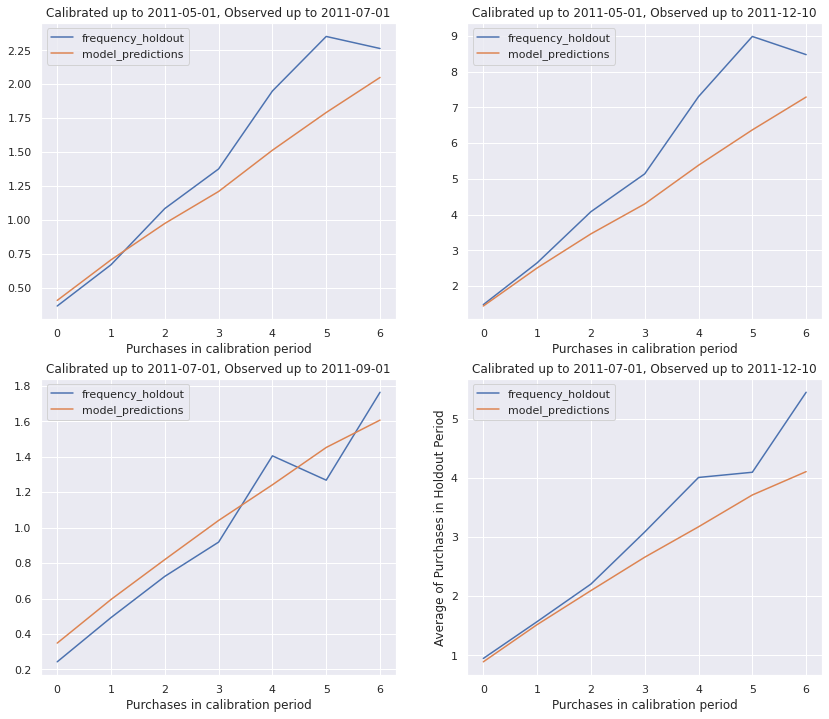

In [61]:
# Here,Calibration Period and Holdout Period,
# both are different 
from lifetimes.utils import calibration_and_holdout_data
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases

df.set_index('InvoiceDate', inplace = True)
df.index = df.index.tz_localize(None)
df.reset_index(inplace = True)

pairs = [('2011-05-01', '2011-07-01'), ('2011-05-01', '2011-12-10'), 
         ('2011-07-01', '2011-09-01'), ('2011-07-01', '2011-12-10')]

#pairs = [('2011-05-01', '2011-07-01'), ('2011-05-01', '2011-12-10')]

fig, axes = plt.subplots(2, 2, figsize = (14, 12))
for ax, pair in zip(axes.flatten(), pairs):
    (cal_period_end, obs_period_end) = pair
    summary_cal_holdout = calibration_and_holdout_data(df, 'CustomerID', 'InvoiceDate',
                                        calibration_period_end = pd.to_datetime(cal_period_end).tz_localize(None), 
                                        observation_period_end = obs_period_end, freq = 'W')
    from lifetimes import ModifiedBetaGeoFitter
    bgf1 = ModifiedBetaGeoFitter(penalizer_coef = 0.01)
    bgf1.fit(summary_cal_holdout['frequency_cal'], summary_cal_holdout['recency_cal'], summary_cal_holdout['T_cal'])
    title = "Calibrated up to " + cal_period_end + ", Observed up to " + obs_period_end
    plot_calibration_purchases_vs_holdout_purchases(mbgf, summary_cal_holdout, ax = ax)
    ax.set_title(title)
    ax.set_xlabel('Purchases in calibration period')


In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(frequency_holdout, model_predictions)

NameError: ignored

**CLV CALCULATIONS**

In [ ]:
returning_customers_summary = data[data['frequency']>0]
print(returning_customers_summary.head())
print(len(returning_customers_summary))

            CustomerID  frequency  ...  monetary_value  predicted_purchases
CustomerID                         ...                                     
12347.0        12347.0        6.0  ...      599.701667             0.156054
12348.0        12348.0        3.0  ...      301.480000             0.089249
12352.0        12352.0        6.0  ...      368.256667             0.186244
12356.0        12356.0        2.0  ...      269.905000             0.071449
12358.0        12358.0        1.0  ...      683.200000             0.082845

[5 rows x 6 columns]
2790


In [ ]:
from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(returning_customers_summary['frequency'],
        returning_customers_summary['monetary_value'])
print(ggf)

In [ ]:
#After applying Gamma-Gamma model, now we can estimate average transaction value for each customer. 

print(ggf.conditional_expected_average_profit(
        returning_customers_summary['frequency'],
        returning_customers_summary['monetary_value']
    ).head(10))

In [ ]:
#Calculate Customer Lifetime Value
returning_customers_summary['CLV'] = round(ggf.customer_lifetime_value(
    bgf, returning_customers_summary['frequency'],returning_customers_summary['recency'],
    returning_customers_summary['T'], returning_customers_summary['monetary_value'],
    time=12, discount_rate=0.01 ), 2)

returning_customers_summary.drop( returning_customers_summary.iloc[:, 0:6], inplace=True, axis=1 )

returning_customers_summary.sort_values(by='CLV', ascending=False).head(10).reset_index()
